In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

Reading the Data

In [2]:
cars=pd.read_csv("C:/Users/DIYA ENGINEER/Downloads/Cars.csv")

Checking the Heads of the Data

In [3]:
cars.tail()

Name    Location    Year  Kilometers_Driven  \
5956              Honda Civic        Pune  2011.0            47000.0   
5957              Hyundai i20       Delhi  2013.0            63777.0   
5958             Maruti Swift  Coimbatore  2016.0            37806.0   
5959  Mercedes-Benz SLK-Class  Coimbatore  2016.0            22732.0   
5960              Hyundai i10     Kolkata  2016.0             7000.0   

     Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  \
5956    Petrol    Automatic     Second   13.9 kmpl  1799 CC  130.3 bhp   
5957    Petrol       Manual      First   18.5 kmpl  1197 CC   82.9 bhp   
5958    Petrol       Manual      First   20.4 kmpl  1197 CC  81.80 bhp   
5959    Petrol    Automatic      First   18.1 kmpl  3498 CC    306 bhp   
5960    Petrol       Manual      First  20.36 kmpl  1197 CC   78.9 bhp   

            Colour  Seats  No. of Doors New_Price  Price  
5956        Others    5.0           4.0       NaN   4.50  
5957  Black/Silver    5.0           4.0       NaN   3.67  
5958  Black/Silver    5.0           4.0       NaN   5.20  
5959  Black/Silver    2.0           2.0       NaN  55.54  
5960         White    5.0           4.0       NaN   3.60

Getting the Information

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5961 non-null   object 
 1   Location           5950 non-null   object 
 2   Year               5959 non-null   float64
 3   Kilometers_Driven  5953 non-null   float64
 4   Fuel_Type          5961 non-null   object 
 5   Transmission       5934 non-null   object 
 6   Owner_Type         5946 non-null   object 
 7   Mileage            5959 non-null   object 
 8   Engine             5944 non-null   object 
 9   Power              5929 non-null   object 
 10  Colour             5950 non-null   object 
 11  Seats              5956 non-null   float64
 12  No. of Doors       5960 non-null   float64
 13  New_Price          824 non-null    object 
 14  Price              5961 non-null   float64
dtypes: float64(5), object(10)
memory usage: 698.7+ KB


Getting the Summary Statistics

In [5]:
cars.describe(include='all').T

count unique           top  freq     mean       std   min  \
Name               5961    212  Maruti Swift   343      NaN       NaN   NaN   
Location           5950     11        Mumbai   781      NaN       NaN   NaN   
Year               5959    NaN           NaN   NaN  2013.39   3.24305  1998   
Kilometers_Driven  5953    NaN           NaN   NaN  58711.1   91712.2   171   
Fuel_Type          5961      5        Diesel  3188      NaN       NaN   NaN   
Transmission       5934      2        Manual  4225      NaN       NaN   NaN   
Owner_Type         5946      4         First  4875      NaN       NaN   NaN   
Mileage            5959    439     18.9 kmpl   172      NaN       NaN   NaN   
Engine             5944    143       1197 CC   606      NaN       NaN   NaN   
Power              5929    369        74 bhp   233      NaN       NaN   NaN   
Colour             5950      3         White  2115      NaN       NaN   NaN   
Seats              5956    NaN           NaN   NaN  5.26914  0.789048     2   
No. of Doors       5960    NaN           NaN   NaN  4.11493  0.344757     2   
New_Price           824    540    63.71 Lakh     6      NaN       NaN   NaN   
Price              5961    NaN           NaN   NaN   9.5281   11.2144  0.44   

                      25%    50%    75%      max  
Name                  NaN    NaN    NaN      NaN  
Location              NaN    NaN    NaN      NaN  
Year               2011.5   2014   2016     2019  
Kilometers_Driven   33931  53000  73000  6.5e+06  
Fuel_Type             NaN    NaN    NaN      NaN  
Transmission          NaN    NaN    NaN      NaN  
Owner_Type            NaN    NaN    NaN      NaN  
Mileage               NaN    NaN    NaN      NaN  
Engine                NaN    NaN    NaN      NaN  
Power                 NaN    NaN    NaN      NaN  
Colour                NaN    NaN    NaN      NaN  
Seats                   5      5      5       10  
No. of Doors            4      4      4        5  
New_Price             NaN    NaN    NaN      NaN  
Price                 3.5   5.66     10      160

Now Checking for Null Values

In [6]:
cars.isnull().sum()

Name                    0
Location               11
Year                    2
Kilometers_Driven       8
Fuel_Type               0
Transmission           27
Owner_Type             15
Mileage                 2
Engine                 17
Power                  32
Colour                 11
Seats                   5
No. of Doors            1
New_Price            5137
Price                   0
dtype: int64

Getting % Null Values

In [7]:
cars.isnull().sum()/cars.isnull().sum().sum()*100

Name                  0.000000
Location              0.208808
Year                  0.037965
Kilometers_Driven     0.151860
Fuel_Type             0.000000
Transmission          0.512528
Owner_Type            0.284738
Mileage               0.037965
Engine                0.322703
Power                 0.607441
Colour                0.208808
Seats                 0.094913
No. of Doors          0.018983
New_Price            97.513288
Price                 0.000000
dtype: float64

As the New_Price has 97.51% of Null Values, we would drop this column for now.

In [8]:
cars=cars.drop('New_Price',axis=1)

In [9]:
cars.head()

Name   Location    Year  Kilometers_Driven Fuel_Type  \
0  Mahindra Scorpio       Pune  2012.0            99000.0    Diesel   
1     Maruti Baleno      Kochi  2018.0            18678.0    Petrol   
2     Mahindra Xylo  Bangalore  2013.0           197000.0    Diesel   
3     Hyundai Grand      Delhi  2014.0            45000.0    Diesel   
4     Toyota Innova      Delhi  2011.0            65000.0    Diesel   

  Transmission Owner_Type     Mileage   Engine    Power        Colour  Seats  \
0       Manual      Third  12.05 kmpl  2179 CC  120 bhp  Black/Silver    8.0   
1       Manual      First   21.1 kmpl   998 CC  100 bhp        Others    5.0   
2       Manual      First  11.68 kmpl  2498 CC  112 bhp         White    7.0   
3       Manual      First   24.0 kmpl  1120 CC   70 bhp         White    5.0   
4       Manual      First   12.8 kmpl  2494 CC  102 bhp        Others    8.0   

   No. of Doors  Price  
0           5.0   6.00  
1           4.0   8.32  
2           5.0   4.00  
3           4.0   3.49  
4           5.0   6.40

Now, checking if any Duplicates are their or not.

In [10]:
cars.duplicated().sum()

2

In [11]:
cars.drop_duplicates(inplace=True)

Checking for Object Data Type

In [12]:
cars.select_dtypes(include='object').head()

Name   Location Fuel_Type Transmission Owner_Type     Mileage  \
0  Mahindra Scorpio       Pune    Diesel       Manual      Third  12.05 kmpl   
1     Maruti Baleno      Kochi    Petrol       Manual      First   21.1 kmpl   
2     Mahindra Xylo  Bangalore    Diesel       Manual      First  11.68 kmpl   
3     Hyundai Grand      Delhi    Diesel       Manual      First   24.0 kmpl   
4     Toyota Innova      Delhi    Diesel       Manual      First   12.8 kmpl   

    Engine    Power        Colour  
0  2179 CC  120 bhp  Black/Silver  
1   998 CC  100 bhp        Others  
2  2498 CC  112 bhp         White  
3  1120 CC   70 bhp         White  
4  2494 CC  102 bhp        Others

In [13]:
cars['Mileage']=cars['Mileage'].str.replace(',','').str.replace('kmpl','').str.replace('km/kg','').astype('float')

In [14]:
cars['Engine']=cars['Engine'].str.replace(',','').str.replace('CC','').astype('float')

In [15]:
cars['Power']=cars['Power'].replace('null bhp',0)
cars['Power']=cars['Power'].str.replace(',','').str.replace('bhp','').astype('float')

In [16]:
cars.select_dtypes(include='object').head()

Name   Location Fuel_Type Transmission Owner_Type        Colour
0  Mahindra Scorpio       Pune    Diesel       Manual      Third  Black/Silver
1     Maruti Baleno      Kochi    Petrol       Manual      First        Others
2     Mahindra Xylo  Bangalore    Diesel       Manual      First         White
3     Hyundai Grand      Delhi    Diesel       Manual      First         White
4     Toyota Innova      Delhi    Diesel       Manual      First        Others

Creating a new column "BRAND" which has the brand name of the Cars.

In [17]:
cars['Brand']=cars.Name.apply(lambda x:x.split(' ')[0])

In [18]:
cars.Brand.value_counts()

Maruti           1187
Hyundai          1100
Honda             601
Toyota            410
Mercedes-Benz     318
Volkswagen        315
Ford              298
Mahindra          272
BMW               267
Audi              236
Tata              184
Skoda             173
Renault           143
Chevrolet         113
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Bentley             1
Isuzu               1
Lamborghini         1
Name: Brand, dtype: int64

In [19]:
cars['Brand']=cars['Brand'].str.replace('ISUZU','Isuzu')

Creating a new column "MODEL" which has the Model name of the cars

In [20]:
cars['Model']=cars.Name.apply(lambda x: ' '.join(x.split(' ')[1:]))

In [21]:
pd.options.display.max_rows=300
cars['Model'].value_counts().sort_index(ascending=True)

1                     3
1000                  1
3                    98
5                    68
6                     7
7                    13
800                  12
A                     8
A-Star               17
A3                    4
A4                   78
A6                   49
A7                    3
A8                    2
Accent               18
Accord               26
Alto                142
Amaze               106
Ameo                 19
Aspire                4
Aveo                 14
Avventura             4
B                    12
BR-V                  3
BRV                   5
Baleno               62
Beat                 46
Beetle                1
Bolero               15
Bolt                  4
Boxster               1
Brio                 60
C-Class               3
CLA                  13
CLS-Class             1
CR-V                 26
Camry                11
Captiva               2
Captur                3
Cayenne               7
Cayman                2
Cedia           

Model Ecosport is available twice in different cases ('Ecosport', 'Ecosport'). To avoid this being considered as 2 different models, correct to single format.

In [22]:
cars['Model']=cars['Model'].str.replace('EcoSport','EcoSport')

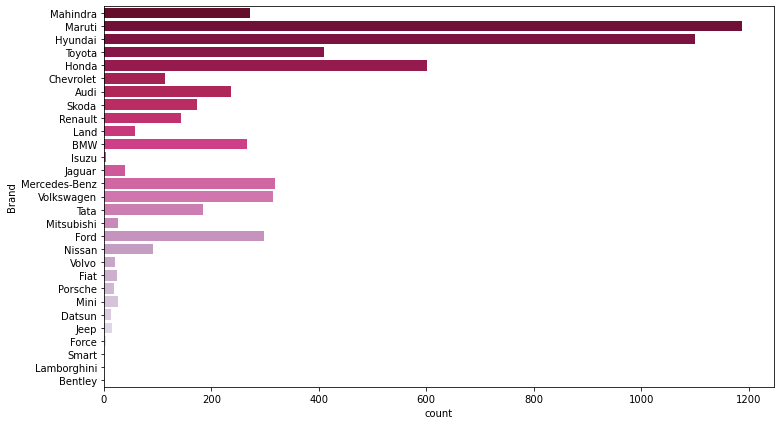

In [23]:
plt.figure(figsize=(12,7))
sns.countplot(y=(cars.Brand),palette='PuRd_r');

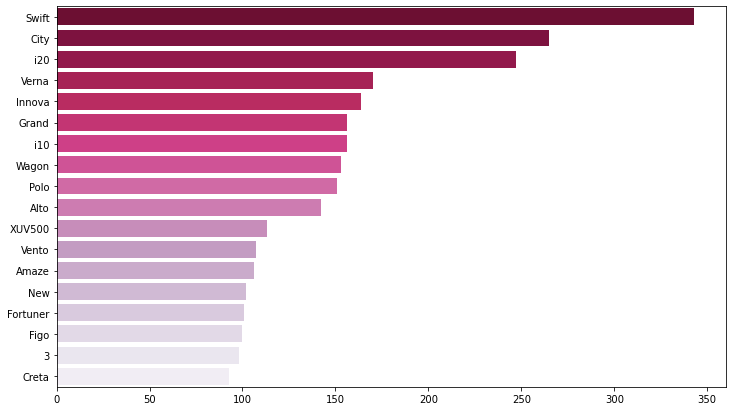

In [24]:
plt.figure(figsize=(12,7))
sns.barplot(y=cars.Model.value_counts()[cars.Model.value_counts()>90].index,
           x=cars.Model.value_counts()[cars.Model.value_counts()>90].values,palette='PuRd_r');

In the above graph their are- Car by the Model name 'New', let's check which car is it. There is also a car by the Model name '3', let's check which car is it.

In [25]:
cars[cars['Model']=='New'].head(2)

Name   Location    Year  Kilometers_Driven Fuel_Type  \
71   Mercedes-Benz New  Hyderabad  2012.0            86000.0    Diesel   
279  Mercedes-Benz New     Jaipur  2009.0           116000.0    Diesel   

    Transmission Owner_Type  Mileage  Engine  Power Colour  Seats  \
71     Automatic      First    14.84  2143.0  170.0  White    5.0   
279       Manual     Second    15.80  2148.0  170.0  White    5.0   

     No. of Doors  Price          Brand Model  
71            4.0   19.0  Mercedes-Benz   New  
279           4.0    8.5  Mercedes-Benz   New

In [26]:
cars[cars['Model']=='3'].head(2)

Name Location    Year  Kilometers_Driven Fuel_Type Transmission  \
22  BMW 3   Mumbai  2014.0            48000.0    Diesel    Automatic   
35  BMW 3  Chennai  2009.0           137000.0    Diesel    Automatic   

   Owner_Type  Mileage  Engine  Power  Colour  Seats  No. of Doors  Price  \
22      First    21.76  1995.0  190.0  Others    5.0           4.0   26.5   
35     Second    13.20  1995.0  170.0  Others    5.0           4.0    9.0   

   Brand Model  
22   BMW     3  
35   BMW     3

Bin the cars as per average price of the brand-

1. 'Budget_Friendly'
2. 'Medium_Range'
3. 'TopNotch_Cars'

In [27]:
cars.Price.describe()

count    5959.000000
mean        9.529916
std        11.215743
min         0.440000
25%         3.500000
50%         5.660000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

In [28]:
###Binning the car companies based on the average prices of each car company.
cars['Price']=cars['Price'].astype('int')
cars_2=cars.copy()
t=cars_2.groupby(['Brand'])['Price'].mean()
t


Brand
Audi              25.131356
BMW               24.823970
Bentley           59.000000
Chevrolet          2.451327
Datsun             2.538462
Fiat               2.800000
Force              9.333333
Ford               6.429530
Honda              4.935108
Hyundai            4.861818
Isuzu             14.666667
Jaguar            37.300000
Jeep              18.333333
Lamborghini      120.000000
Land              39.456140
Mahindra           7.610294
Maruti             4.058972
Mercedes-Benz     26.433962
Mini              26.538462
Mitsubishi        10.629630
Nissan             4.274725
Porsche           48.055556
Renault            5.307692
Skoda              7.075145
Smart              3.000000
Tata               3.065217
Toyota            11.131707
Volkswagen         4.790476
Volvo             18.523810
Name: Price, dtype: float64

In [29]:
cars_2 = cars_2.merge(t.reset_index(), how='left',on='Brand')
bins=[0,10,20,160]
label=['Budget_Friendly','Medium_Range','TopNotch_Cars']
cars['Cars_category']=pd.cut(cars_2['Price_y'],bins,right=False,labels=label)
cars.head()

Name   Location    Year  Kilometers_Driven Fuel_Type  \
0  Mahindra Scorpio       Pune  2012.0            99000.0    Diesel   
1     Maruti Baleno      Kochi  2018.0            18678.0    Petrol   
2     Mahindra Xylo  Bangalore  2013.0           197000.0    Diesel   
3     Hyundai Grand      Delhi  2014.0            45000.0    Diesel   
4     Toyota Innova      Delhi  2011.0            65000.0    Diesel   

  Transmission Owner_Type  Mileage  Engine  Power        Colour  Seats  \
0       Manual      Third    12.05  2179.0  120.0  Black/Silver    8.0   
1       Manual      First    21.10   998.0  100.0        Others    5.0   
2       Manual      First    11.68  2498.0  112.0         White    7.0   
3       Manual      First    24.00  1120.0   70.0         White    5.0   
4       Manual      First    12.80  2494.0  102.0        Others    8.0   

   No. of Doors  Price     Brand    Model    Cars_category  
0           5.0      6  Mahindra  Scorpio  Budget_Friendly  
1           4.0      8    Maruti   Baleno  Budget_Friendly  
2           5.0      4  Mahindra     Xylo  Budget_Friendly  
3           4.0      3   Hyundai    Grand  Budget_Friendly  
4           5.0      6    Toyota   Innova     Medium_Range

In [30]:
cars.Cars_category.value_counts()

Budget_Friendly    4518
TopNotch_Cars       964
Medium_Range        475
Name: Cars_category, dtype: int64

In [31]:
-cars.groupby(['Brand']).Cars_category.value_counts()

Brand          Cars_category  
Audi           TopNotch_Cars      -224
               Budget_Friendly     -11
               Medium_Range         -1
BMW            TopNotch_Cars      -255
               Budget_Friendly      -9
               Medium_Range         -3
Bentley        TopNotch_Cars        -1
Chevrolet      Budget_Friendly    -109
               Medium_Range         -3
               TopNotch_Cars        -1
Datsun         Budget_Friendly     -12
               TopNotch_Cars        -1
Fiat           Budget_Friendly     -24
               TopNotch_Cars        -1
Force          Budget_Friendly      -3
Ford           Budget_Friendly    -294
               TopNotch_Cars        -3
               Medium_Range         -1
Honda          Budget_Friendly    -592
               TopNotch_Cars        -8
               Medium_Range         -1
Hyundai        Budget_Friendly   -1083
               TopNotch_Cars       -11
               Medium_Range         -5
Isuzu          Medium_Range      

Creating a new column 'CarAge'

In [32]:
import datetime
now=datetime.datetime.now()
now.year
cars['CarAge']=now.year-cars.Year

In [33]:
cars.CarAge.value_counts().sort_index(ascending=True)

4.0     101
5.0     298
6.0     586
7.0     739
8.0     736
9.0     793
10.0    642
11.0    573
12.0    461
13.0    338
14.0    196
15.0    170
16.0    122
17.0     75
18.0     55
19.0     28
20.0     13
21.0     14
22.0      7
23.0      4
24.0      2
25.0      4
Name: CarAge, dtype: int64

Checking for Outliers

shape before outliers Treatment (5959, 18)


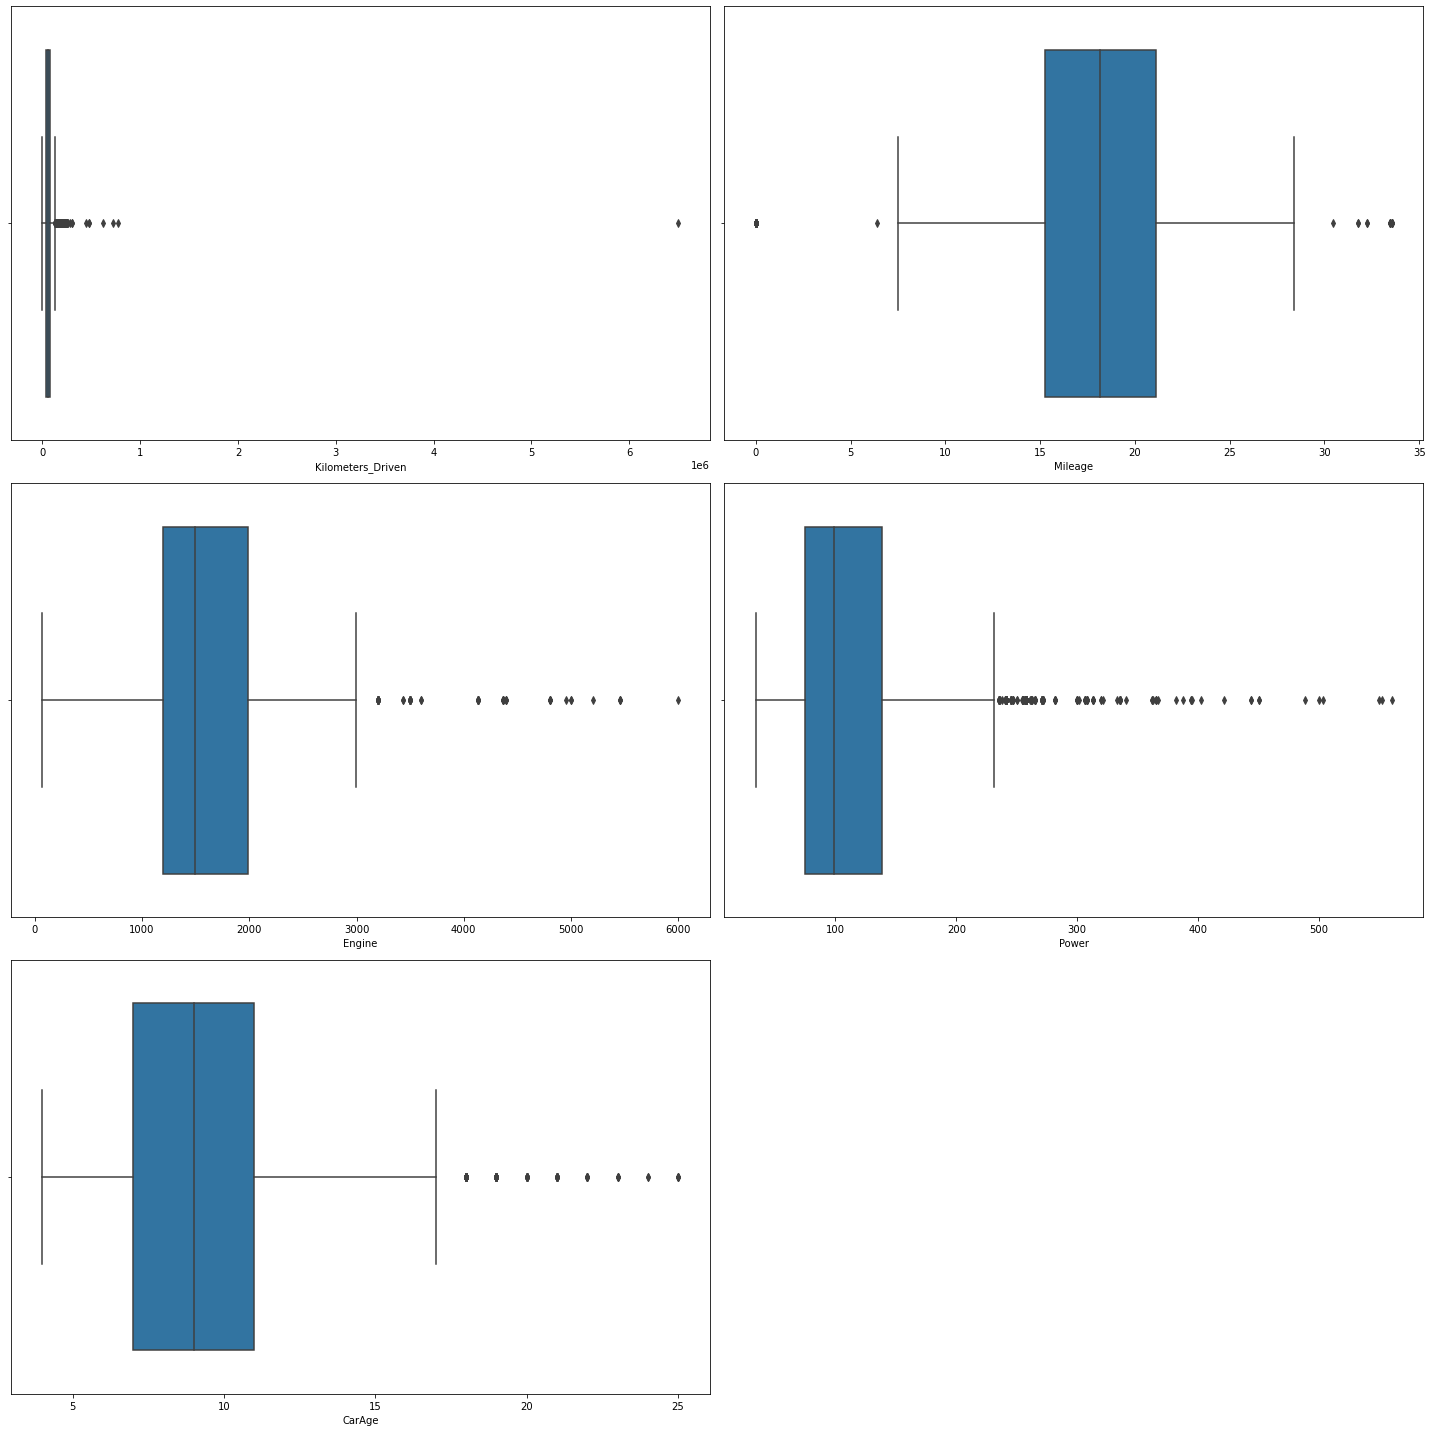

In [34]:
data_plot=cars[['Kilometers_Driven','Mileage','Engine','Power','CarAge']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('shape before outliers Treatment',cars.shape)

Seems like Lilometers_Driven Power, Engine have many outliers after observing the graph.

Outliers Treatment

In [35]:
Q1=cars.quantile(0.25)
Q3=cars.quantile(0.75)
IQR =Q3-Q1
lower_range=Q1-(1.5*IQR)
upper_range=Q3+(1.5*IQR)

In [36]:
lower_range

Year                  2006.00
Kilometers_Driven   -24586.25
Mileage                  6.50
Engine                  19.00
Power                  -19.65
Seats                    5.00
No. of Doors             4.00
Price                   -7.50
CarAge                   1.00
dtype: float64

In [37]:
upper_range

Year                   2022.00
Kilometers_Driven    131551.75
Mileage                  29.86
Engine                 3163.00
Power                   232.75
Seats                     5.00
No. of Doors              4.00
Price                    20.50
CarAge                   17.00
dtype: float64

Doing Null Imputation

In [38]:
cols=cars.isnull().sum()[cars.isnull().sum()>0].index

In [39]:
cols

Index(['Location', 'Year', 'Kilometers_Driven', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Colour', 'Seats', 'No. of Doors',
       'Cars_category', 'CarAge'],
      dtype='object')

In [40]:
objects=cars[cols].select_dtypes(include=['object','category']).columns
non_objects=cars[cols].select_dtypes(include=['object','category']).columns

Now Imputing the Non-Object values using Median

In [41]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)
imputer= imputer.fit(cars[non_objects].iloc[:,:])

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'Pune'

In [42]:
cars[non_objects]=imputer.transform(cars[non_objects])

NotFittedError: This SimpleImputer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Impute the object values using mode

In [43]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values =np.nan,strategy ='most_frequent',verbose=0)
imputer=imputer.fit(cars[non_objects].iloc[:,:])

In [44]:
cars[objects]=imputer.transform(cars[non_objects])

In [45]:
cars.isnull().sum()

Name                   0
Location               0
Year                   2
Kilometers_Driven      8
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                17
Power                135
Colour                 0
Seats                  5
No. of Doors           1
Price                  0
Brand                  0
Model                  0
Cars_category          0
CarAge                 2
dtype: int64

There is no null values now


Correlation Plot

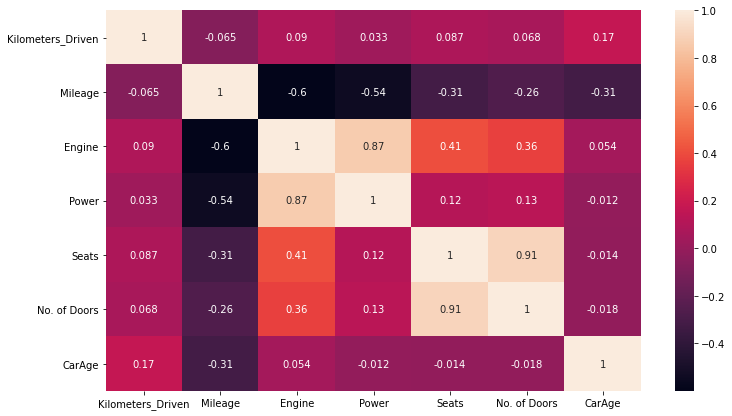

In [46]:
X=cars.drop(['Price','Name','Year'],axis=1)
plt.figure(figsize=(12,7))
sns.heatmap(X.iloc[:].corr(),annot=True)

Encode the Data

In [47]:
cars.select_dtypes(include='object').head()

Name   Location Fuel_Type Transmission Owner_Type  \
0  Mahindra Scorpio       Pune    Diesel       Manual      Third   
1     Maruti Baleno      Kochi    Petrol       Manual      First   
2     Mahindra Xylo  Bangalore    Diesel       Manual      First   
3     Hyundai Grand      Delhi    Diesel       Manual      First   
4     Toyota Innova      Delhi    Diesel       Manual      First   

         Colour     Brand    Model    Cars_category  
0  Black/Silver  Mahindra  Scorpio  Budget_Friendly  
1        Others    Maruti   Baleno  Budget_Friendly  
2         White  Mahindra     Xylo  Budget_Friendly  
3         White   Hyundai    Grand  Budget_Friendly  
4        Others    Toyota   Innova     Medium_Range

In [48]:
for feature in cars.columns:
    if cars[feature].dtype == 'object':
        cars[feature] = pd.Categorical(cars[feature]).codes
        
        cars.Cars_Category=pd.Categorical(cars.Cars_Category).codes

AttributeError: 'DataFrame' object has no attribute 'Cars_Category'

In [49]:
cars.dtypes

Name                   int16
Location              object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Colour                object
Seats                float64
No. of Doors         float64
Price                  int32
Brand                 object
Model                 object
Cars_category         object
CarAge               float64
dtype: object

Split the Data

In [50]:
x=cars.drop(['Price','Name','Year'],axis=1)  ### name is splitted in model and brand; year is transformed to CarAge
y=cars.Price

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.30)

In [52]:
ss=StandardScaler()
### we are scaling the data for ANN. without it will give very poor results. compulations becomes easier
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

ValueError: could not convert string to float: 'Mumbai'